In [4]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib
from scipy.optimize import curve_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Fixed single Boston experiment for all dataset as points

In [19]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [20]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [21]:
N = 50

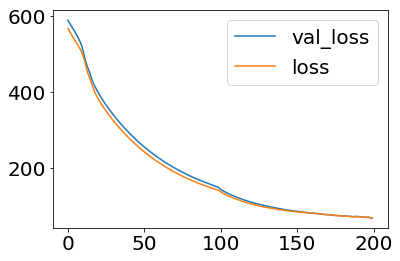

In [31]:
# Train a network with given h1 size and compute mean FT variance
K.clear_session()
    
# run with random weights and multiple inputs
exp = BostonHousingExperiment(N = [N, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = 'plot',
                                  reg_coeff = 0, reg_type = 'l2')

In [110]:
# obtaining data points
data = exp.x_train, exp.y_train#exp.get_inputs_outputs('all')

In [111]:
var_loss = np.mean(exp._get_bound_b3_loss(*data)['std'] ** 2)
print('variance loss error', var_loss)

variance loss error 19.931334


TypeError: activation_fcn() missing 1 required positional argument: 'x'

In [128]:
preact = exp.W[0] @ data[0].T + np.reshape(exp.B[0], (-1, 1))
y = exp.activation_fcn(preact)

In [139]:
y_norm_max = np.max(np.linalg.norm(y, axis = 0))

In [140]:
norm_prod = np.prod([np.linalg.norm(w) for w in exp.W[1:]])

In [153]:
# TODO: do spectral bound for variance (now just estimate)
spectral_bound = p * norm_prod ** 2 * y_norm_max ** 2

In [152]:
spectral_bound

1669.3458345813408

In [154]:
### TODO: compute using Hoeffding what is the probability of too big error in weights?

In [113]:
print('mean loss error', np.mean(exp._get_bound_b3_loss(*data)['mean']))

mean loss error 0.037543956
